In [8]:
# from datetime import timedelta
import tropycal.tracks as tracks
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np


In [6]:
basin = tracks.TrackDataset(basin='north_atlantic',source='hurdat',include_btk=False)
season = basin.get_season(2017)
#print(season)
season.to_dataframe()
#season.summary()

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (2.21 seconds)


,id,name,vmax,mslp,category,ace,start_time,end_time,start_lat,start_lon
0,AL012017,ARLENE,45,990,0,0.8,2017-04-19 00:00:00,2017-04-21 06:00:00,31.1,-42.6
1,AL022017,BRET,45,1007,0,0.5,2017-06-19 18:00:00,2017-06-20 09:00:00,9.2,-58.9
2,AL032017,CINDY,50,991,0,1.8,2017-06-20 18:00:00,2017-06-23 12:00:00,25.6,-90.6
3,AL042017,FOUR,25,1009,-1,0.0,2017-07-05 18:00:00,2017-07-07 12:00:00,12.0,-37.1
4,AL052017,DON,45,1005,0,0.8,2017-07-17 06:00:00,2017-07-18 12:00:00,10.4,-49.1
5,AL062017,EMILY,50,1001,0,0.6,2017-07-30 18:00:00,2017-08-01 18:00:00,28.4,-85.4
6,AL072017,FRANKLIN,75,981,1,3.7,2017-08-07 00:00:00,2017-08-10 12:00:00,16.1,-82.7
7,AL082017,GERT,95,962,2,7.8,2017-08-12 18:00:00,2017-08-17 12:00:00,24.0,-69.4
8,AL092017,HARVEY,115,937,4,11.4,2017-08-17 06:00:00,2017-09-01 00:00:00,13.4,-52.0
9,AL112017,IRMA,155,914,5,64.9,2017-08-30 00:00:00,2017-09-12 00:00:00,16.1,-26.9


In [11]:
%%time
season_df = season.to_dataframe()
storm_names = season_df['name'].tolist() #List of storm names

RI=[]

# Loop over each year from 2001 to 2021
for year in range(2001, 2012):
    print(year)
    # Get the season data for the current year
    season = basin.get_season(year)
    season_df = season.to_dataframe()

    # Extract the list of storm names
    storm_names = season_df['name'].tolist()
    for k in range(0,len(storm_names)):
        #print(storm_names[k], year)
        if storm_names[k] != 'UNNAMED':
            storm = basin.get_storm((storm_names[k], year))  #Loop to find each storm name
            time = storm['time']
            vmax = storm['vmax']
            lat = storm['lat']
            lon = storm['lon']
            data = {'time':time,'vmax': vmax,'lat':lat,'lon':lon}
            df = pd.DataFrame(data)

            for i in range(0, len(df)-4):
                window24hr = [df['vmax'][i+1] - df['vmax'][i], df['vmax'][i+2] - df['vmax'][i], df['vmax'][i+3] - df['vmax'][i], df['vmax'][i+4] - df['vmax'][i]]
                #print(df['vmax'][i+1] - df['vmax'][i], df['vmax'][i+2] - df['vmax'][i], df['vmax'][i+3] - df['vmax'][i], df['vmax'][i+4] - df['vmax'][i])

                idx = np.argmax(window24hr)
                max_24 = window24hr[idx]
         

                idx_list = [i+1, i+2, i+3, i+4]
                j = idx_list[idx]

                if max_24 >= 30:
                    RI.append((storm_names[k], df['time'][i], df['time'][j],max_24, lat[i], lon[i]))

        RI_df = pd.DataFrame(RI,columns=['storm','Start Time','End Time', 'Vmax Change','lat','lon'])
print(RI_df)


2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
    storm          Start Time            End Time  Vmax Change   lat   lon
0    DEAN 2001-08-26 12:00:00 2001-08-27 12:00:00           30  35.2 -65.5
1    DEAN 2001-08-26 18:00:00 2001-08-27 18:00:00           30  35.5 -65.0
2    ERIN 2001-09-08 00:00:00 2001-09-09 00:00:00           40  26.0 -58.3
3    ERIN 2001-09-08 06:00:00 2001-09-09 06:00:00           50  26.5 -58.8
4    ERIN 2001-09-08 12:00:00 2001-09-09 12:00:00           50  27.2 -59.2
..    ...                 ...                 ...          ...   ...   ...
238  RINA 2011-10-23 18:00:00 2011-10-24 18:00:00           35  15.5 -81.7
239  RINA 2011-10-24 00:00:00 2011-10-25 00:00:00           40  16.0 -81.9
240  RINA 2011-10-24 06:00:00 2011-10-25 06:00:00           50  16.5 -82.2
241  RINA 2011-10-24 12:00:00 2011-10-25 12:00:00           45  16.9 -82.6
242  RINA 2011-10-24 18:00:00 2011-10-25 18:00:00           35  17.1 -83.0

[243 rows x 6 columns]
CPU times: user 1.95 

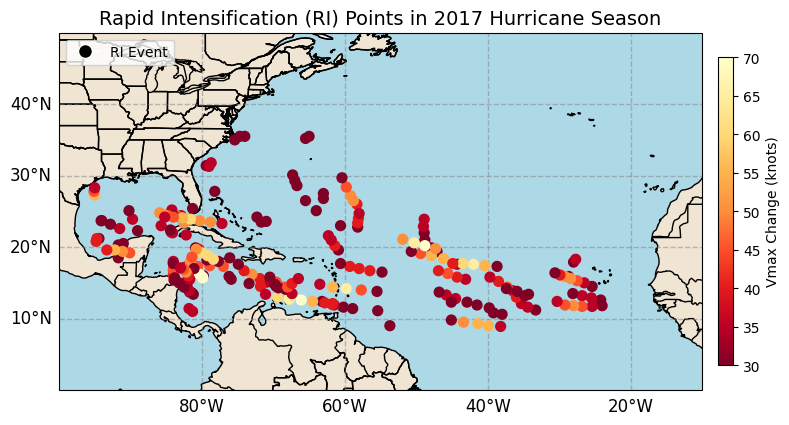

In [24]:
# Create a Cartopy map
'''
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-100, -10, 0, 50], crs=ccrs.PlateCarree())

# Custom colors for land and ocean
land_color = '#f0e4d3'  # light beige
ocean_color = '#add8e6'  # light blue


# Add geographical features with custom colors
ax.add_feature(cfeature.LAND, facecolor=land_color)
ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, edgecolor='black')
ax.add_feature(cfeature.STATES, edgecolor='black')
colors = 'red'  # Example color setting
'''
# Create the plot and scatter points
fig = plt.figure(figsize=(10, 8))
#ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# # Create a Cartopy map
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-100, -10, 0, 50], crs=ccrs.PlateCarree())

# Custom colors for land and ocean
land_color = '#f0e4d3'  # light beige
ocean_color = '#add8e6'  # light blue

# Add geographical features with custom colors
ax.add_feature(cfeature.LAND, facecolor=land_color)
ax.add_feature(cfeature.OCEAN, facecolor=ocean_color)
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, edgecolor='black')
ax.add_feature(cfeature.STATES, edgecolor='black')

# Plot the RI points with intensity color scale
sc = ax.scatter(RI_df['lon'], RI_df['lat'], c=RI_df['Vmax Change'], cmap='YlOrRd_r', s=50,
                transform=ccrs.PlateCarree(), label='RI Points', zorder=5, vmax = 70)

# Add color bar
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.5, pad=0.02)
cbar.set_label('Vmax Change (knots)')
#cbar.set_ticks([30, 40, 50, 60, 70])  # Specify ticks for clarity

# Adjust the legend to show a black dot instead of red
legend_handle = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10)
plt.legend([legend_handle], ['RI Event'], loc='upper left')

# Add gridlines with labels (only left and bottom, no labels on top and right)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}
# Add a title
plt.title('Rapid Intensification (RI) Points in 2017 Hurricane Season', fontsize=14)

# Show the plot
plt.savefig('2017_RI_Hurricanes.png', dpi = 500)

#plt.show (dpi = 500)


